In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import os

**Merge thr datas**

In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/Sales_Data/Sales_April_2019.csv")

files = [file for file in os.listdir("/content/drive/MyDrive/Sales_Data")]

df = pd.DataFrame()

for file in files:
  df1 = pd.read_csv("/content/drive/MyDrive/Sales_Data/" + file)
  df = pd.concat([df, df1])

df.to_csv("sales_data.csv", index=False)

In [2]:
adf = pd.read_csv("/content/sales_data.csv")
adf.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [3]:
print(f"shape of data: {adf.shape}\n size of data {adf.size}")

shape of data: (186850, 6)
 size of data 1121100


In [4]:
adf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [5]:
adf.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


# **data cleaning**

**1.Drops row of null**

In [6]:
adf.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [7]:
adf = adf.dropna(how="all")

**Find "or" and delete it**

In [9]:
adf = adf[adf['Order Date'].str[0:2] != "Or"]

**3.conver colums to the correct type**

In [11]:
adf["Quantity Ordered"] =pd.to_numeric(adf["Quantity Ordered"])
adf["Price Each"] = pd.to_numeric(adf["Price Each"])

In [20]:
adf['Order Date']= pd.to_datetime(adf['Order Date'])

# **Feature engineering**

**1.add month column**

In [10]:
adf["month"] = adf["Order Date"].str[0:2]
adf["month"] = adf["month"].astype("int32")
adf.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


**2. add sales column**

In [12]:
adf["Sales"] = adf["Quantity Ordered"] * adf["Price Each"]
adf.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


**3.Add City Column**

In [17]:
adf["City"] = adf["Purchase Address"].apply(lambda x: x.split(",")[1] + " (" + x.split(",")[2].split(' ')[1] + ")")
adf.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY)
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA)


**4.Add Hour column**

In [21]:
adf["Hours"] = adf["Order Date"].dt.hour
adf["count"] = 1
adf.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,Hours,count
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),7,1
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),18,1
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),15,1
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),12,1


# **Exploratory data analysis (EDA)**

**Q1. What Was The Best Month For Sale? How Mutch Was Earned That Month**

In [30]:
result = adf.groupby(['month'], as_index=False).sum().sort_values(by='Sales', ascending=False)

<ipython-input-30-1f3baa745224>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result = adf.groupby(['month'], as_index=False).sum().sort_values(by='Sales', ascending=False)


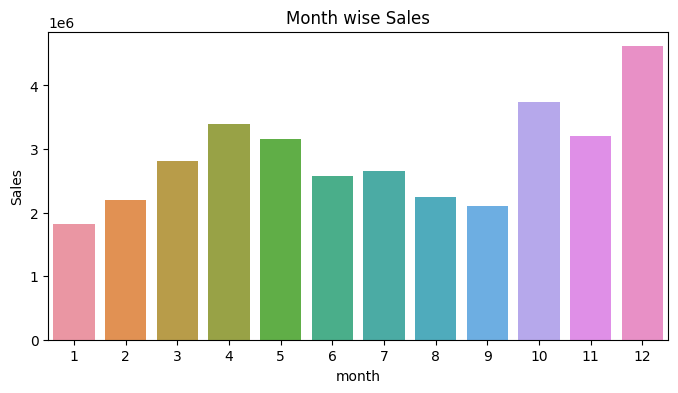

In [16]:
plt.figure(figsize=(8,4))
sn.barplot(x = 'month',y= 'Sales' ,data = result)
plt.title("Month wise Sales")

plt.show()

**Q2. whitch city had the highest number of sales?**

---



In [18]:
result1=adf.groupby(['City'], as_index=False).sum().sort_values(by='Sales', ascending=False)

<ipython-input-18-63a8df0a7ef4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result1=adf.groupby(['City'], as_index=False).sum().sort_values(by='Sales', ascending=False)


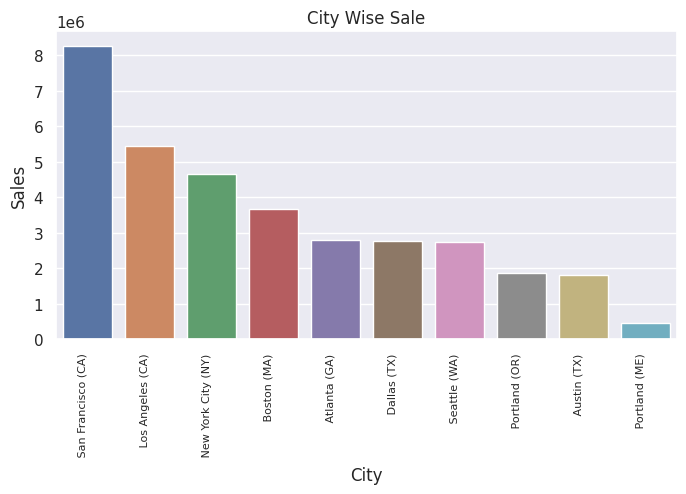

In [19]:
sn.set(rc={'figure.figsize':(8,4)})
sn.barplot(x = 'City',y= 'Sales' ,data = result1)

plt.xticks(size=8, rotation=90, ha='right')
plt.title("City Wise Sale")
plt.show()

**Q3. what time should we display advertisements to maximize likelihood of customers buying product ?**

In [23]:
result2 = adf.groupby(['Hours'], as_index=False).sum()

<ipython-input-23-5ced8bad0cbe>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result2 = adf.groupby(['Hours'], as_index=False).sum()


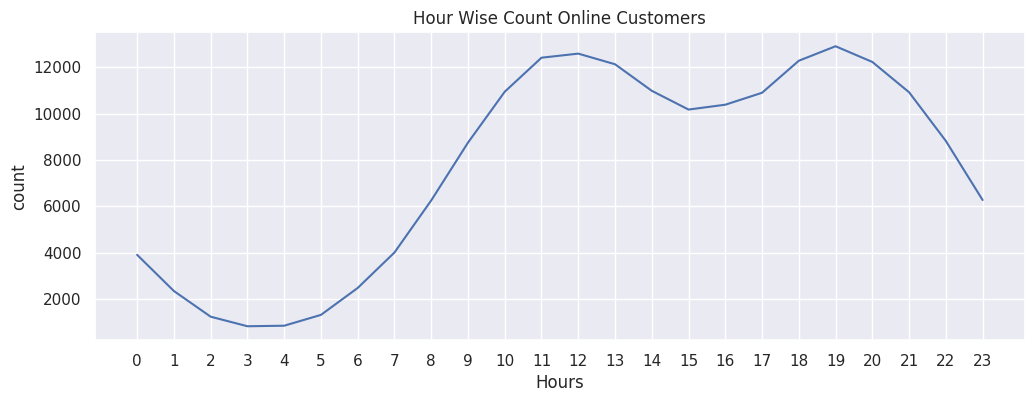

In [24]:
hour=adf["Hours"].unique()

plt.figure(figsize=(12,4))
sn.lineplot(x="Hours", y="count", data=result2)

plt.xticks(hour)
plt.title("Hour Wise Count Online Customers")
plt.show()

**Q5.witch product sold the most? why do you think it sold the most?**

In [32]:
Quantity_Ordered = adf.groupby(["Product"], as_index=False)["Quantity Ordered"].sum().sort_values(by="Quantity Ordered", ascending=False)

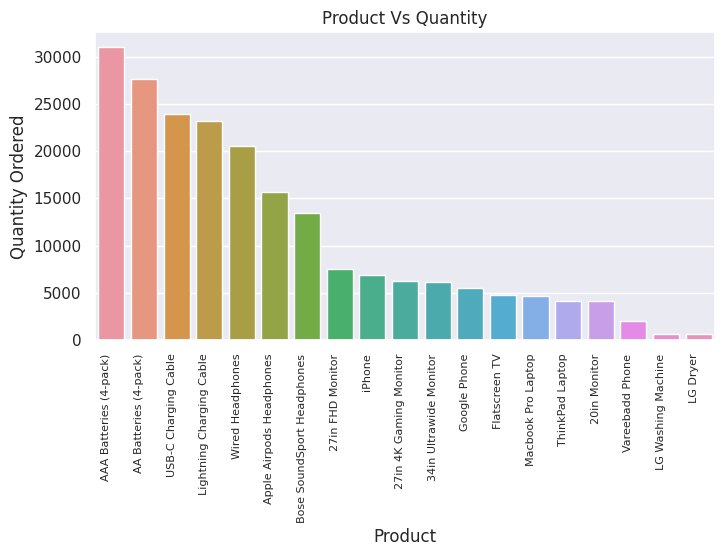

In [26]:
sn.set(rc={'figure.figsize':(8,4)})
sn.barplot(x = "Product",y= 'Quantity Ordered' ,data = Quantity_Ordered)

plt.xticks(size=8, rotation=90, ha='right')
plt.title("Product Vs Quantity")
plt.show()

In [27]:
products = [product for product,df in adf.groupby('Product') ]
Quantity_Ordered1= adf.groupby(["Product"])["Quantity Ordered"].sum()
prices = adf.groupby('Product')["Price Each"].mean()

<ipython-input-28-b2def1b32f35>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  ax2.plot(products, prices,'b-',color="green")
<ipython-input-28-b2def1b32f35>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, size=8, rotation=90, ha='right')


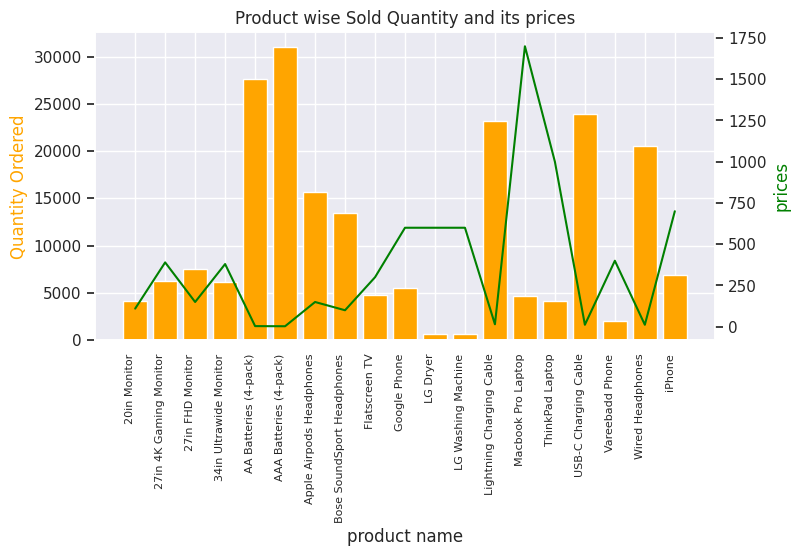

In [28]:

fig, ax1=plt.subplots()
ax2=ax1.twinx()

ax1.bar(products, Quantity_Ordered1, color="orange" )
ax2.plot(products, prices,'b-',color="green")
plt. grid(False)

ax1.set_xlabel("product name")
ax1.set_ylabel("Quantity Ordered", color='orange')
ax2.set_ylabel("prices", color='green')

ax1.set_xticklabels(products, size=8, rotation=90, ha='right')
plt.title("Product wise Sold Quantity and its prices")
plt.show()

# **Conclusion**



1.   december Was The Best Month For Sale. $4613443.34 Was Earned That Month
2.   San Francisco(CA) city had the highest number of sales
3.   11AM to 1PM And 6PM to 8PM time should we display advertisements to maximize likelihood of customers buying product
4.   AAA Batteries(4-pack) product sold the most, I think Because it Have Low Price